# Resnet20+CBAM on  Cifar10 dataset testing


### **Step#1**: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#############################################
import tensorflow as tf
import keras
#################################
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
from keras.models import Model
from keras.layers import Lambda
from keras.datasets import cifar10
#############################################
from models import resnet_v1 
from models.utils import lr_schedule, get_label
print("tensorflow_version",tf.__version__)
print("keras_version",keras.__version__)


tensorflow_version 2.15.0
keras_version 2.15.0


### **Step#2**: load ResNet20+CBAM model and weights

In [2]:

# Load the ResNet-20 model with CBAM layers
resnet20CBAM_model = load_model("saved_models\cifar10_resnet20_cbam_block_model.h5")
resnet20CBAM_model.load_weights("saved_models\cifar10_resnet20_cbam_block_model.h5")
# summarize model.
resnet20CBAM_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 16)           448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 16)           64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 16)           0         ['batch_normalization[0]

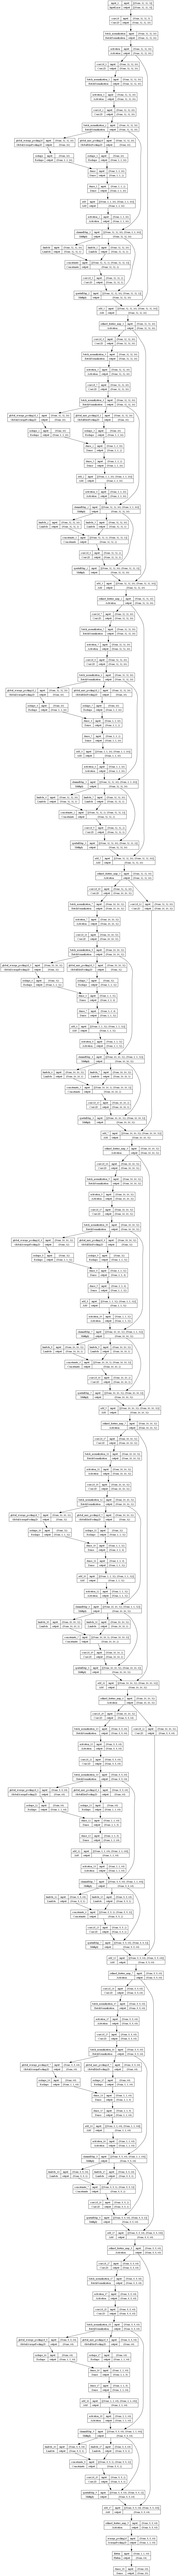

In [3]:
## Ensure the train and test directories exist
#os.makedirs(CNNmodel_dirPath, exist_ok=True)

import pydotplus.graphviz as gv

# Specify the GraphViz executable path
gv.find_graphviz()

# Now try to plot the model
from keras.utils import plot_model
plot_model(resnet20CBAM_model, show_shapes=True)


 ### **Step#3**: Load CIFAR-10 dataset and Split the data into training and testing sets

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### **Step#4**: Visualize the CIFAR-10 dataset

In [5]:
labels_mapping = [ "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [6]:
# Create a dictionary that maps each label to its index
label_to_index = {label: index for label,index in enumerate(labels_mapping)}
print(label_to_index)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


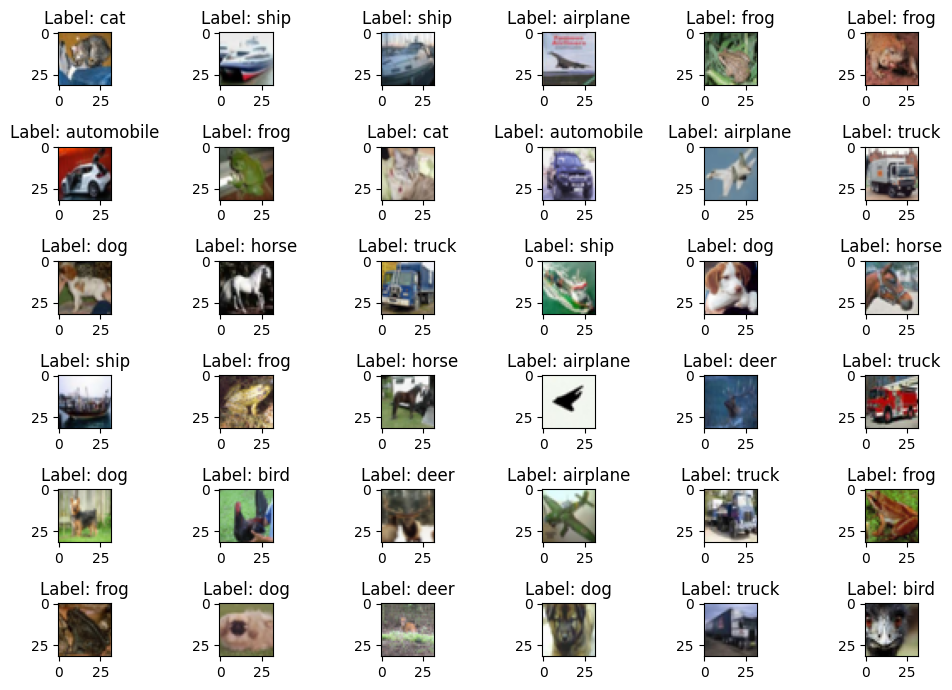

In [7]:
fig, ax = plt.subplots(6, 6, figsize=(10, 7)) 
k = 0
for i in range(6): 
    for j in range(6): 
        ax[i][j].imshow(test_images[k].reshape(32, 32,3))#, aspect='auto') 
        arr = np.array(test_labels[k]).item()
        label_for_index = label_to_index.get(arr, "Index not found")
        ax[i][j].set_title('Label: {}'.format(label_for_index))
        k += 1

plt.tight_layout()
plt.show()


120
 Image 120 is [8],Invalid key


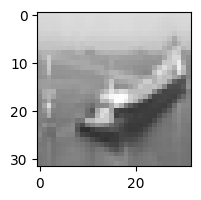

In [8]:

indexx=120
my_image1 = test_images[indexx]
plt.figure(figsize=(2, 2))  # Adjust the figsize to reduce the size
plt.imshow(my_image1)
arr = np.array(test_labels[indexx]).item()
print(indexx)
label_for_index = get_label(indexx)
print(f" Image {indexx} is {test_labels[indexx]},{label_for_index}")


In [9]:
# Normalize data.
my_image  = my_image1 / 255.0 # Normalize pixel values to between 0 and 1
print(my_image)

[[[0.85490196 0.85490196 0.85490196]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  ...
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]]

 [[0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  ...
  [0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  [0.84705882 0.84705882 0.84705882]]

 [[0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]
  [0.84313725 0.84313725 0.84313725]
  ...
  [0.83921569 0.83921569 0.83921569]
  [0.84313725 0.84313725 0.84313725]
  [0.83921569 0.83921569 0.83921569]]

 ...

 [[0.46666667 0.46666667 0.46666667]
  [0.4745098  0.4745098  0.4745098 ]
  [0.50196078 0.50196078 0.50196078]
  ...
  [0.4745098  0.4745098  0.4745098 ]
  [0.45882353 0.45882353 0.45882353]
  [0.45098039 0.45098039 0.45098039]]

 [[0.45490196 0.45490196 0.45490196]
  [0.47058824 0.47058824 0.47058824]


In [10]:
my_image.shape

(32, 32, 3)

In [11]:
my_image= np.expand_dims(my_image, axis=0)

In [12]:
# Extracting architecture details
archit = []

for layer in resnet20CBAM_model.layers:
    layer_type = layer.name
    archit.append((layer_type))

attention_maps_layer=[]
for att_map in archit:
    if att_map.split("_")[0] == "spartialMap" :
        attention_maps_layer.append(att_map)


feature_maps_layer=[]
for fea_map in archit:
    if fea_map.split("_")[0] == "refined" :
        feature_maps_layer.append(fea_map)


print(archit)
print(attention_maps_layer)
print(feature_maps_layer)

['input_1', 'conv2d', 'batch_normalization', 'activation', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'conv2d_2', 'batch_normalization_2', 'global_average_pooling2d', 'global_max_pooling2d', 'reshape', 'reshape_1', 'dense', 'dense_1', 'add', 'activation_2', 'channelMap_1', 'lambda', 'lambda_1', 'concatenate', 'conv2d_3', 'spartialMap_1', 'add_1', 'refined_feature_map_1', 'conv2d_4', 'batch_normalization_3', 'activation_3', 'conv2d_5', 'batch_normalization_4', 'global_average_pooling2d_1', 'global_max_pooling2d_1', 'reshape_2', 'reshape_3', 'dense_2', 'dense_3', 'add_2', 'activation_4', 'channelMap_2', 'lambda_2', 'lambda_3', 'concatenate_1', 'conv2d_6', 'spartialMap_2', 'add_3', 'refined_feature_map_2', 'conv2d_7', 'batch_normalization_5', 'activation_5', 'conv2d_8', 'batch_normalization_6', 'global_average_pooling2d_2', 'global_max_pooling2d_2', 'reshape_4', 'reshape_5', 'dense_4', 'dense_5', 'add_4', 'activation_6', 'channelMap_3', 'lambda_4', 'lambda_5', 'concatenate_2', '

In [13]:
feature_maps_resnet20CBAM_list=[]
for feat_layer_name in feature_maps_layer:
    feature_maps_resnet20CBAM = Model(inputs=resnet20CBAM_model.input, outputs=resnet20CBAM_model.get_layer(feat_layer_name).output)
    feature_maps_resnet20CBAM_list.append(feature_maps_resnet20CBAM)

print(feature_maps_resnet20CBAM_list)

[<keras.src.engine.functional.Functional object at 0x000001F3C3391410>, <keras.src.engine.functional.Functional object at 0x000001F3CEA53D90>, <keras.src.engine.functional.Functional object at 0x000001F3C2F87390>, <keras.src.engine.functional.Functional object at 0x000001F3C3037810>, <keras.src.engine.functional.Functional object at 0x000001F3C2F768D0>, <keras.src.engine.functional.Functional object at 0x000001F3C2EFC0D0>, <keras.src.engine.functional.Functional object at 0x000001F3C2F635D0>, <keras.src.engine.functional.Functional object at 0x000001F3C2F1A2D0>, <keras.src.engine.functional.Functional object at 0x000001F3C2F2BE10>]


In [14]:
feature_map=[]
for feature_maps_resnet20CBAM in feature_maps_resnet20CBAM_list:
    feature_mapofImage = feature_maps_resnet20CBAM.predict(my_image)
    feature_map.append(feature_mapofImage)


1/1 [==============================] - 2s 2s/step


In [15]:
attention_maps_resnet20CBAM_list=[]
for att_layer_name in attention_maps_layer:
    atteention_maps_resnet20CBAM = Model(inputs=resnet20CBAM_model.input, outputs=resnet20CBAM_model.get_layer(att_layer_name).output)
    attention_maps_resnet20CBAM_list.append(atteention_maps_resnet20CBAM)

print(attention_maps_resnet20CBAM_list)

[<keras.src.engine.functional.Functional object at 0x000001F3C3399B50>, <keras.src.engine.functional.Functional object at 0x000001F3C3180690>, <keras.src.engine.functional.Functional object at 0x000001F3D7A6D890>, <keras.src.engine.functional.Functional object at 0x000001F3D8EA9990>, <keras.src.engine.functional.Functional object at 0x000001F3D8EADCD0>, <keras.src.engine.functional.Functional object at 0x000001F3D8EBF250>, <keras.src.engine.functional.Functional object at 0x000001F3C3199C10>, <keras.src.engine.functional.Functional object at 0x000001F3D8EDF450>, <keras.src.engine.functional.Functional object at 0x000001F3D8EFE590>]


In [16]:
attention_map=[]
for feature_maps_resnet20CBAM in attention_maps_resnet20CBAM_list:
    attention_mapofImage = feature_maps_resnet20CBAM.predict(my_image)
    attention_map.append(attention_mapofImage)


1/1 [==============================] - 2s 2s/step


In [17]:
predict_resnet20CBAM_model= resnet20CBAM_model.predict(my_image)
print(predict_resnet20CBAM_model)

predicted_class=[]
for predict in predict_resnet20CBAM_model:
    pred=predict.tolist()
    # Get the index of the highest probability
    max_index = pred.index(max(pred))
    mapped_range = get_label(max_index)
    predicted_class.append(mapped_range)

print("predicated class: ",(predicted_class))

1/1 [==============================] - 2s 2s/step
[[1.4039567e-04 1.3848393e-03 7.0052614e-05 9.7552165e-03 4.2205611e-06
  4.0578848e-07 5.8335951e-03 1.3841367e-05 9.8278934e-01 8.0837990e-06]]
predicated class:  ['ship']


In [18]:
weighted_feature_maps = [feat_map * att_map for feat_map , att_map in zip(feature_map, attention_map)]

[[ 9.5758839e+00  4.8837938e+00  5.6053348e+00 -4.9721479e-01
  -8.4811950e-01  1.5647626e-01  7.1472216e-01 -1.9285344e+00]
 [ 2.1155088e+01  1.6789154e+01  1.0457463e+01  1.3252243e+01
   1.2531075e+01  1.6237352e+01  1.1941083e+01  2.5222621e+00]
 [ 4.8606770e+01  4.8502319e+01  4.3961952e+01  4.2541618e+01
   3.7083824e+01  4.2977943e+01  4.4316071e+01  1.3874130e+01]
 [ 5.5464508e+01  5.4196434e+01  9.5473099e+01  1.8101768e+02
   1.8503012e+02  1.3849953e+02  1.2432803e+02  4.7631889e+01]
 [ 4.3756313e+01  6.7651810e+01  1.8679652e+02  4.4425208e+02
   4.6431415e+02  2.6007251e+02  1.5793666e+02  8.7403015e+01]
 [ 3.6731209e+01  8.2835007e+01  2.5735583e+02  4.9922504e+02
   4.6947488e+02  2.6914188e+02  1.4189825e+02  7.4288483e+01]
 [ 3.4072418e+01  8.5891373e+01  2.0427054e+02  3.1106287e+02
   2.3913985e+02  1.5984705e+02  7.7343567e+01  3.6392826e+01]
 [ 1.4999380e+01  2.0747307e+01  3.2805496e+01  6.3985001e+01
   7.7752090e+01  6.5755821e+01  3.3821396e+01  1.3173603e+01]]

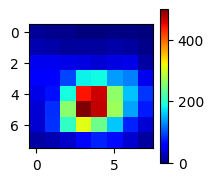

In [19]:
# Sum across channels to obtain the final heat map
heat_map = weighted_feature_maps[8].sum(axis=-1)
# Visualize the heat map
plt.figure(figsize=(2, 2))  # Adjust the figsize to reduce the size
print(heat_map[0])
plt.imshow(heat_map[0], cmap='jet')
plt.colorbar()
plt.show()


In [20]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)
# Number of subplots
heat_map_list=[]
# Create a figure with a grid of subplots
for i in range(len(weighted_feature_maps)):
    # Sum across channels to obtain the final heat map
    heat_map_list.append(weighted_feature_maps[i].sum(axis=-1))
print(heat_map_list)



[array([[[ 0.8371682 , -0.4973474 , -1.7843394 , ..., -4.01832   ,
          0.63071406,  0.0503363 ],
        [-1.290528  ,  2.43985   ,  0.13434276, ...,  2.8106716 ,
          1.1644582 ,  2.0547786 ],
        [-1.2349648 ,  3.4743695 ,  0.14267094, ...,  0.96188366,
          0.41058478,  0.55954564],
        ...,
        [-0.23639564,  1.5007467 ,  0.7439109 , ...,  0.53512186,
          0.4020126 ,  0.8466233 ],
        [ 0.05581842,  1.7553122 ,  0.5310427 , ...,  0.687117  ,
          0.628688  ,  0.82323337],
        [-1.0128772 , -1.818205  , -3.8000839 , ..., -4.0985003 ,
         -2.980691  ,  0.28548717]]], dtype=float32), array([[[ 2.0513358 ,  6.523221  ,  7.0089784 , ..., 12.559626  ,
         17.382288  , 17.71168   ],
        [-2.8764305 ,  0.7807971 , -1.5383359 , ..., -1.0440302 ,
         -0.5081433 ,  2.1699767 ],
        [-7.0322886 ,  0.27362883, -3.046992  , ..., -2.611024  ,
         -0.94457906,  0.2768817 ],
        ...,
        [-1.333297  ,  1.8163042 , -1

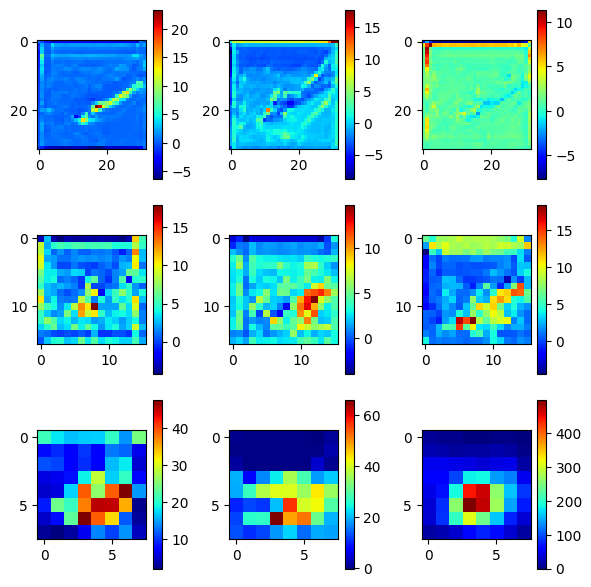

In [21]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)
# Number of subplots
num_subplots = len(heat_map_list)
num_rows = 3
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    im = ax.imshow(heat_map_list[i][0], cmap='jet')
    fig.colorbar(im, ax=ax)

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

# Display all subplots
plt.tight_layout()
plt.show()


In [22]:
# Resize heatmap to match image size
my_image=np.squeeze(my_image, axis=0)
print(f"Image size: {my_image.shape}")
my_heat_map=np.squeeze(heat_map, axis=0)
print(f"Original attention_map size: {my_heat_map.shape}")


Image size: (32, 32, 3)
Original attention_map size: (8, 8)


In [23]:
normalize_resize_heat_map_list=[]
# Create a figure with a grid of subplots
for heat_map in heat_map_list:
    # Sum across channels to obtain the final heat map
    squeeze_heat_map=(np.squeeze(heat_map, axis=0))
    # Normalize the attention map to be in the range [0, 255]
    heat_map_normalize = np.uint8(255 * (squeeze_heat_map - np.min(squeeze_heat_map)) / (np.max(squeeze_heat_map) - np.min(squeeze_heat_map)))
    my_heat_map_normalize_stretch = cv2.resize(heat_map_normalize, (32, 32), interpolation = cv2.INTER_LINEAR)
    apply_colour_heatmap = cv2.applyColorMap(my_heat_map_normalize_stretch, cv2.COLORMAP_JET)
    heat_map_ = cv2.cvtColor(apply_colour_heatmap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    normalize_resize_heat_map_list.append(heat_map_)
    
print("heat map after normalize_resize:", normalize_resize_heat_map_list)
print(f"Resized attention_map size: {my_heat_map_normalize_stretch.shape}")



heat map after normalize_resize: [array([[[  0, 116, 255],
        [  0,  72, 255],
        [  0,  28, 255],
        ...,
        [  0,   0, 208],
        [  0, 112, 255],
        [  0,  92, 255]],

       [[  0,  44, 255],
        [  0, 172, 255],
        [  0,  92, 255],
        ...,
        [  0, 184, 255],
        [  0, 128, 255],
        [  0, 160, 255]],

       [[  0,  48, 255],
        [  0, 208, 255],
        [  0,  92, 255],
        ...,
        [  0, 120, 255],
        [  0, 104, 255],
        [  0, 108, 255]],

       ...,

       [[  0,  80, 255],
        [  0, 140, 255],
        [  0, 116, 255],
        ...,
        [  0, 108, 255],
        [  0, 104, 255],
        [  0, 116, 255]],

       [[  0,  92, 255],
        [  0, 148, 255],
        [  0, 108, 255],
        ...,
        [  0, 112, 255],
        [  0, 112, 255],
        [  0, 116, 255]],

       [[  0,  56, 255],
        [  0,  28, 255],
        [  0,   0, 216],
        ...,
        [  0,   0, 204],
        [  0,  

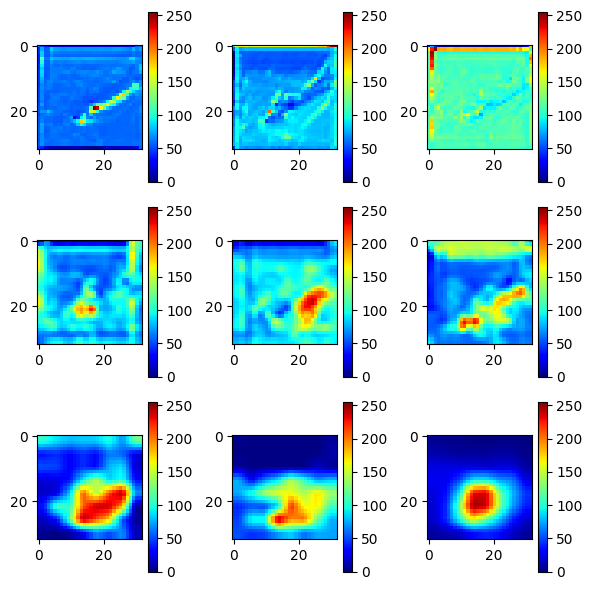

In [24]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)

# Number of subplots
num_subplots = len(normalize_resize_heat_map_list)

num_rows = 3
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
# Create a figure with a grid of subplots
for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
        
    im = ax.imshow(normalize_resize_heat_map_list[i], cmap='jet')
    fig.colorbar(im, ax=ax)
# Display all subplots

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

    
# Display all subplots
plt.tight_layout()
plt.show()


In [25]:
my_image= np.array(my_image)
normalize_resize_heat_map_list= np.array(normalize_resize_heat_map_list)


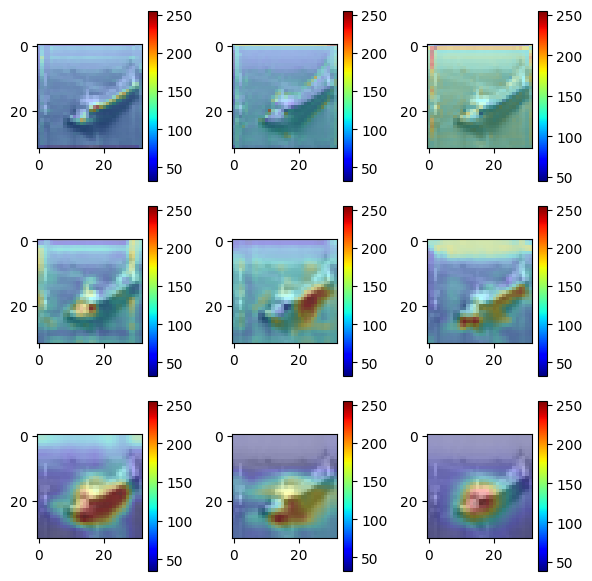

In [26]:
# Blend the images with specified weights
alpha = 0.7  # Weight of the first image
beta = 1.0 - alpha  # Transparency factor for the heatmap # Weight of the second image
gamma = 0    # Scalar added to each sum
# Assuming weighted_feature_maps is a list or array of feature maps
# Number of subplots
num_subplots = len(normalize_resize_heat_map_list)
# Create a figure with a grid of subplots
# Calculate the number of columns needed to fit all subplots in 3 rows
num_rows = 3
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    # Find the correct subplot location
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    blended_image = cv2.addWeighted(my_image1, alpha, normalize_resize_heat_map_list[i], beta, gamma)
    im = ax.imshow(blended_image, cmap='jet')
    fig.colorbar(im, ax=ax)
# Display all subplots

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



In [27]:
kkk

NameError: name 'kkk' is not defined